In [1]:
%pylab inline
import numpy as np
import cPickle as pickle
import seaborn as sns
from matplotlib.collections import LineCollection
import matplotlib.gridspec as gridspec
import re
import pandas as pd

sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [7]:
# investigate ntp results


ntpdata_all = pickle.load(open('ntp_test.pickle', 'r'))

res = []
for n in ntpdata_all:
    res += n
ntpdf = pd.DataFrame(res)
ntpdf['offset_ms'] = ntpdf.offset * 1000

In [3]:
ntpdf.server.value_counts()

ntp1.net.berkeley.edu    800
time.mit.edu             800
2.amazon.pool.ntp.org    800
0.amazon.pool.ntp.org    800
ntp2.net.berkeley.edu    800
1.amazon.pool.ntp.org    800
3.amazon.pool.ntp.org    800
Name: server, dtype: int64

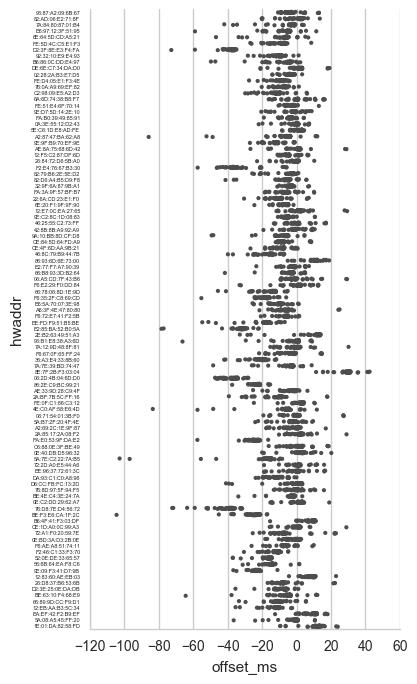

In [4]:
fig = pylab.figure(figsize=(4, 8))
ax = fig.add_subplot(1, 1,1 )
sns.stripplot(x="offset_ms", y="hwaddr", data=ntpdf, # [ntpdf.server == 'ntp1.net.berkeley.edu'],
              jitter=True, size=3, color=".3", linewidth=0, axes=ax)
sns.despine(trim=True)
zed = [tick.label.set_fontsize(4) for tick in pylab.gca().yaxis.get_major_ticks()]


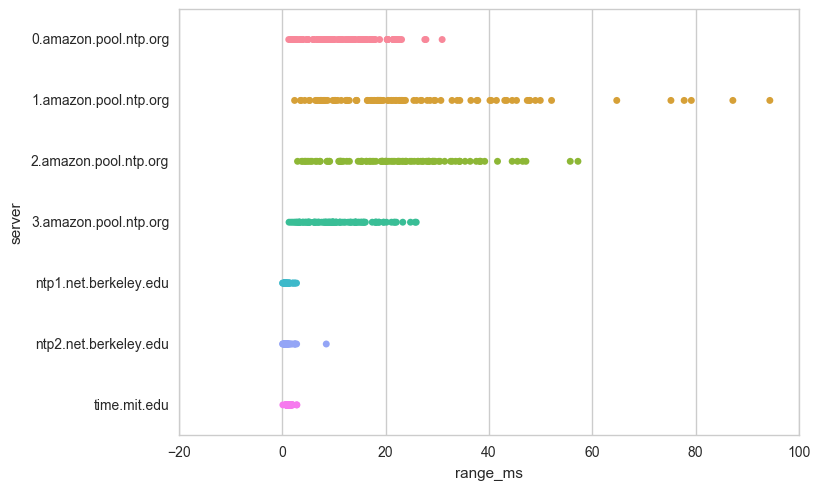

In [5]:
# for each host, look at the variance in responses from each server
a = ntpdf.groupby(['hwaddr', 'server']).agg({'offset_ms' : ['mean', 'std', 'max', 'min']}).reset_index()
a['range_ms'] = a[('offset_ms', 'max')] - a[('offset_ms', 'min')]
#sns.stripplot(y="server", x=('offset_ms', 'std'), data=a)
sns.stripplot(y="server", x='range_ms', data=a)

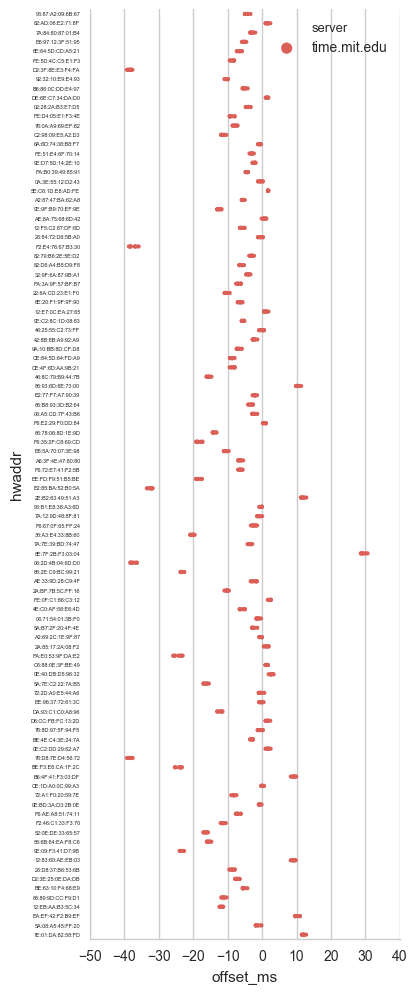

In [14]:
fig = pylab.figure(figsize=(4, 12))
ax = fig.add_subplot(1, 1,1 )

sns.stripplot(x="offset_ms", y="hwaddr",hue='server', # 
              data = ntpdf[ntpdf.server.isin([#'ntp1.net.berkeley.edu', 
                                              #'ntp2.net.berkeley.edu', 
                                              'time.mit.edu'])],
              jitter=False, size=3, color=".3", #split=True,
              linewidth=0, axes=ax, palette= sns.color_palette("hls", 3),)
sns.despine(trim=True)
zed = [tick.label.set_fontsize(4) for tick in pylab.gca().yaxis.get_major_ticks()]
#pylab.figure("NTP time offset to {}")